# Jensen's Inequality (Chapter 4)

This notebook covers the code to generate Figure 4.8 in Chapter 4 of the textbook "Fundamentals of Active Inference".

==========================================================================
* **Author**: Sanjeev Namjoshi (sanjeev.namjoshi@gmail.com)

* **Version**: 0.1

*This Jupyter notebook should only be distributed to members of the "Fundamentals of Active Inference" reading group hosted by the Active Inference Institute.*

Package versions:
* seaborn==3.5.3
* numpy==1.21.5
* pyro-ppl==1.8.4
* pytorch==1.13.1

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

plt.rcParams.update({
    "figure.dpi": 120})

mpl.style.use("seaborn-deep")

In the text we discussed how variational free energy is an "upper bound" on surprisal. This is due to Jensen's Inequality which states that "an expectation of a function is always greater than a function of expectation" for nonlinear functions. 

$$
\mathbb{E}[f(X)] \geq f(\mathbb{E}[X]).
$$

This is relevant because variational free energy is an expectation of a function:

$$
VFE = \int_x q(x) \log \frac{q(x)}{p(x,y)}dx
$$

And surprisal can be shown to be a function of expectation if we rewrite it in terms of $q(x)$:

$$
-\log p(y) = -\log \int_x q(x) \frac{p(x,y)}{q(x)} dx
$$

This leads to the fact that $VFE \geq -\log p(y)$, or that free energy is an upper bound on surprisal.

To demonstrate Jensen's Inequality we show this just using simple functions. Suppose we have the function $f(x) = 3x+8$ and some input data $x$. We can calculate $y$ for each value of $x$.

In [14]:
def linear_func(x):
    return 3*x + 8

x = [5, 9, 3, 5, 1, 5, 6]
y = [linear_func(x_i) for x_i in x]

Next we take $\mathbb{E}[f(X)]$ and compare it to $f(\mathbb{E}[X])$.

In [15]:
exp_func = np.mean(y)                 # Expectation of function
func_exp = linear_func(np.mean(x))    # Function of expectation

print(f"The expectation of the function, {round(exp_func, 2)}, is equal to the function of the expectation, {round(func_exp, 2)}.")

The expectation of the function, 22.57, is equal to the function of the expectation, 22.57.


However, this fact does not hold for concave functions like variational free energy (VFE) and surprisal which are described in terms of the natural log function. In this case the function would be $f(x) = \ln(x)$ and we calculate $y$ over sample values of $x$.

In [16]:
def nonlinear_func(x):
    return -np.log(x)

x = [5, 9, 3, 5, 1, 5, 6]
y = [nonlinear_func(x_i) for x_i in x]

In [17]:
exp_func = np.mean(y)                 # Expectation of function
func_exp = nonlinear_func(np.mean(x))    # Function of expectation

print(f"The expectation of the function, {round(exp_func, 2)}, is NOT equal to the function of the expectation, {round(func_exp, 2)}. The expectation of a function is greater than the function of the expectation for the convex negative log function.")

The expectation of the function, -1.42, is NOT equal to the function of the expectation, -1.58. The expectation of a function is greater than the function of the expectation for the convex negative log function.


Now we plot to show this fact. See main text for details.

In [19]:
x = list(range(0,30))
x[0] = 0.00001
y = [nonlinear_func(x_i) for x_i in x]

np.random.seed(3535)
dat = np.random.normal(15, 5, 50)
log_dat = [nonlinear_func(x_i) for x_i in dat]

<Figure size 768x576 with 0 Axes>

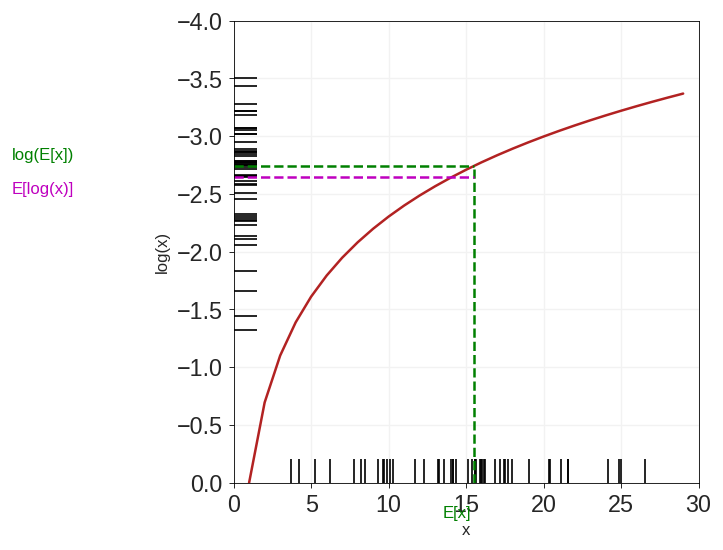

In [23]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure()
fig, ax = plt.subplots(1, 1, facecolor=(1,1,1), figsize=(5,5))

# Main function line
plt.plot(x, y, color = "firebrick")

# Rugplots on axes
sns.rugplot(x = dat, height = 0.05, color = "k")
sns.rugplot(y = log_dat, height = 0.05, color = "k")

# Vertical and horizontal intersection lines
plt.vlines(x = np.mean(dat), ymin = 0, ymax = nonlinear_func(np.mean(dat)), linestyles = "--", color = ["g"])   # E[x]
plt.hlines(y = nonlinear_func(np.mean(dat)), xmin = 0, xmax = np.mean(dat), linestyles = "--", color = ["g"])   # ln(E[x])
plt.hlines(y = np.mean(log_dat), xmin = 0, xmax = np.mean(dat), linestyles = "--", color = ["m"])               # E[ln(x)]

# Set axis ranges
plt.xlim([0,30])
plt.ylim([0,-4])

# Set axes labels
plt.xlabel("x")
plt.ylabel("log(x)")

# Add text to the sides for the different expectations
plt.text(np.mean(dat)-2, 0.3, "E[x]", color = "g")
plt.text(-14.3, -2.5, "E[log(x)]", color = "m")
plt.text(-14.3, -2.8, "log(E[x])", color = "g")

ax.axes.grid(which="major", axis="both", c="#f2f2f2")
plt.setp(ax.spines.values(), color="black", linewidth=0.5)
ax.tick_params(
    labelsize=14,
    axis='both',          
    which='major',      
    bottom=True,
    left=True,
    color="black",
    width=0.5,
    length=3)
